# Audio Classification

Librosa is a Python package for music and audio analysis. Librosa is basically used when we work with audio data like in music generation(using LSTM's), Automatic Speech Recognition. It provides the building blocks necessary to create the music information retrieval systems.

It gives sampling frequency 22.05KHz and normalize the data.
if audio is stereotype then librosa will convert into mono type by default.


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd #to display graph of audio 
import librosa
import librosa.display
%matplotlib inline

In [ ]:
filename1='/content/drive/MyDrive/project/Audio_data/AS_New1/New_AS_001.wav'

The sampling rate refers to the number of samples of audio recorded every second.the Nyquist frequency is half of the sampling rate
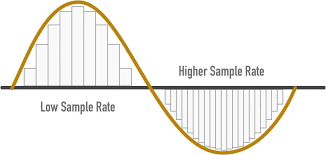
Higher sample rates can have advantages for professional music and audio production work, but many professionals work at 44.1 kHz.

The most common values for the sampling rate is the aforementioned 8kHz (most common for telephone communications), 44.1kHz (most common for music CDs), and 48kHz (most common for audio tracks in movies)

In [ ]:
!dir

drive  sample_data


Sounds are two type: Mono- like in headphone both will give same audio.
In stereotype -both hear will listen different sounds like in one only base and other music.


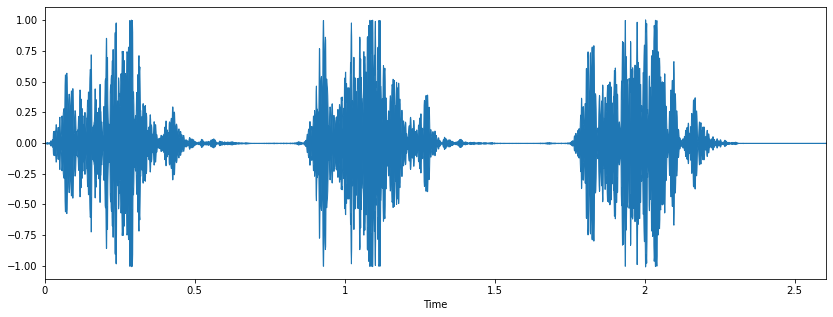

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename1)

In [ ]:
sample_rate

22050

** We will not use scipy package, just to know 

SciPy is an open-source Python library which is used to solve scientific and mathematical problems. It is built on the NumPy extension and allows the user to manipulate and visualize data with a wide range of high-level command

The** wave module in Python's standard library**  is an easy interface to the audio WAV format. The functions in this module can write audio data in raw format to a file like object and read the attributes of a WAV file

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename1)
wave_sample_rate


8000

In [ ]:
wave_audio

array([42, 49, 52, ..., 45, 44, 57], dtype=int16)

In [ ]:
data

array([0.00124933, 0.00150507, 0.00156087, ..., 0.00136094, 0.00070327,
       0.        ], dtype=float32)

Audio classification and preprocessing

librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')

Load an audio file as a floating point time series.

Audio will be automatically resampled to the given rate (default sr=22050).

To preserve the native sampling rate of the file, use sr=None.

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/project/Audio_data/AS_New1/New_AS_001.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.00124933 0.00150507 0.00156087 ... 0.00136094 0.00070327 0.        ]


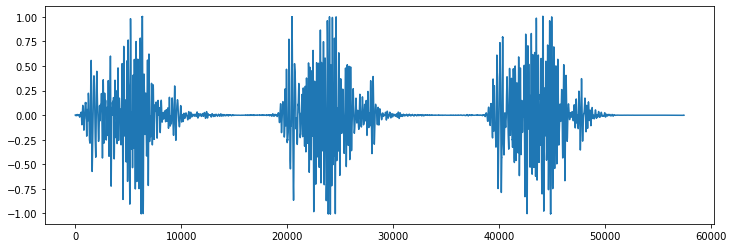

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([42, 49, 52, ..., 45, 44, 57], dtype=int16)

In [ ]:
import pandas as pd

metadata=pd.read_excel('/content/drive/MyDrive/project/audio_labelled_data_fold.xlsx')
metadata.head( )

,index,audio_file,class,fold,audio_file_name
0,0,New_AS_001,AS,1,New_AS_001.wav
1,1,New_AS_002,AS,1,New_AS_002.wav
2,2,New_AS_003,AS,1,New_AS_003.wav
3,3,New_AS_004,AS,1,New_AS_004.wav
4,4,New_AS_005,AS,1,New_AS_005.wav


In [ ]:
len(metadata)

1000

In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

AS     200
MR     200
MS     200
MVP    200
NM     200
Name: class, dtype: int64

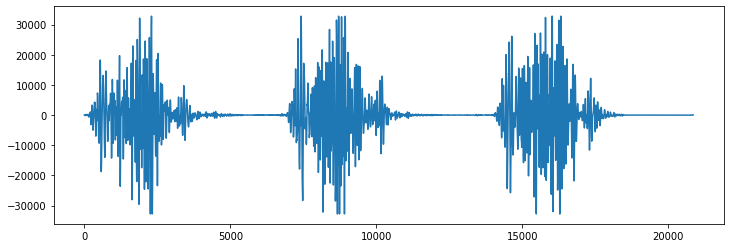

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

#Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

The ***MFCC feature extraction technique*** basically includes windowing the signal, applying the DFT, taking the log of the magnitude, and then warping the frequencies on a Mel scale, followed by applying the inverse DCT.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 113)


In [ ]:
mfccs

array([[-4.23273651e+02, -4.00148895e+02, -3.81612701e+02, ...,
        -4.86475037e+02, -4.80593414e+02, -4.70885712e+02],
       [ 8.33266144e+01,  1.14183929e+02,  1.36923981e+02, ...,
         1.54318309e+00,  9.48984623e+00,  2.24123726e+01],
       [ 6.40341110e+01,  8.99074707e+01,  1.05043564e+02, ...,
         1.37111425e+00,  8.26811981e+00,  1.90070210e+01],
       ...,
       [-3.13620758e+00, -2.94952798e+00, -3.41158915e+00, ...,
         1.32745528e+00,  7.02068746e-01, -1.01420724e+00],
       [-4.44508791e+00, -4.53737688e+00, -5.26696396e+00, ...,
         1.13647509e+00,  1.66414976e-01, -1.73697090e+00],
       [-4.44630051e+00, -5.66630936e+00, -7.28986835e+00, ...,
         8.82078946e-01, -4.49605167e-01, -2.37163663e+00]], dtype=float32)

In [ ]:
len(mfccs)

40

The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules. This module provides a portable way of using operating system-dependent functionality. The *os* and *os. path* modules include many functions to interact with the file system

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/project/Audio_data/'
metadata=pd.read_excel('/content/drive/MyDrive/project/audio_labelled_data_fold.xlsx')
metadata.head(1000)

,index,audio_file,class,fold,audio_file_name
0,0,New_AS_001,AS,1,New_AS_001.wav
1,1,New_AS_002,AS,1,New_AS_002.wav
2,2,New_AS_003,AS,1,New_AS_003.wav
3,3,New_AS_004,AS,1,New_AS_004.wav
4,4,New_AS_005,AS,1,New_AS_005.wav
...,...,...,...,...,...
995,995,New_N_196,NM,5,New_N_196.wav
996,996,New_N_197,NM,5,New_N_197.wav
997,997,New_N_198,NM,5,New_N_198.wav
998,998,New_N_199,NM,5,New_N_199.wav


In [ ]:
# file_name='/content/drive/MyDrive/project/Audio_data/audio_wave_files_all/New_AS_001.wav'

In [ ]:
def features_extractor(file):
  # If you need to reduce load time, you can pass in an optional parameter to the load function, 'res_type',
  #  short for resample type(default is 'kaiser_best').
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

os.path.join() method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory separator (‘/’) is put at the end. 

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),"AS_New"+str(row["fold"])+'/',str(row["audio_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

1000it [09:11,  1.81it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(1000)
# extracted_feature_df.feature

,feature,class
0,"[-396.042, 102.59673, 60.76835, 43.35072, 31.3...",AS
1,"[-393.85965, 103.1507, 56.89034, 42.117702, 32...",AS
2,"[-397.27283, 104.66249, 57.698475, 42.841106, ...",AS
3,"[-396.5857, 103.161224, 57.89285, 42.997288, 3...",AS
4,"[-399.21957, 103.85208, 58.298985, 43.28135, 3...",AS
...,...,...
995,"[-547.7488, 57.940437, 39.29017, 30.839338, 25...",NM
996,"[-543.7893, 58.01047, 38.8654, 30.375275, 24.8...",NM
997,"[-547.22906, 56.986202, 39.367424, 31.59536, 2...",NM
998,"[-550.9845, 58.02287, 37.93574, 30.199884, 25....",NM


In [ ]:
pd.DataFrame(extracted_features_df).to_excel('mfcc_extracted_data.xlsx', header=False, index=False)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:

X.shape

(1000, 40)

In [ ]:
y

In [ ]:
# y=y.reshape(-1,1) 


In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
# from tensorflow.keras import utils

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape

(1000, 5)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
X_train

In [ ]:
X_train.shape

(800, 40)

In [ ]:

X_test.shape

(200, 40)

In [ ]:
y_train.shape

(800, 5)

In [ ]:
y_test.shape

(200, 5)

#Model Creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow.keras

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8200      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               60300     
                                                                 
 activation_1 (Activation)   (None, 300)               0         
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               6

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()  

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9850000143051147


In [ ]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

1.0


In [ ]:
file_name="/content/drive/MyDrive/project/Audio_data/AS_New1/New_AS_001.wav"
prediction_feature=features_extractor(file_name)
prediction_features=prediction_feature.reshape(-1,1)
fea=model.predict(prediction_features)
fea=np.round(fea).astype(int)

predicted_label= model.predict(mfccs_scaled_features)
predicted_label = np.round(predicted_label).astype(int)


In [ ]:
prediction_feature.reshape(-1,1).shape

(40, 1)

In [ ]:
prediction_feature.reshape(-1,1)

In [ ]:
X_test[1]

In [ ]:
model.predict(prediction_features)

#Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [ ]:
filename="/content/drive/MyDrive/project/Audio_data/AS_New2/New_MR_007.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features);
# print(mfccs_scaled_features.shape)
predicted_label= model.predict(mfccs_scaled_features)
predicted_label = np.round(predicted_label).astype(int)
# predicted_label=model.predict_classess(mfccs_scaled_features)
print(predicted_label)
# prediction_class = labelencoder.inverse_transform(predicted_label) 
# prediction_class

[[0 1 0 0 0]]
